# Clustering
[SXSW Tweets Sentiment Analysis](https://github.com/czarinagluna/Twitter-Sentiment-Analysis/blob/main/sxsw-sentiment-analysis.ipynb)

Authors: Marcelo Scatena, Czarina Luna, Piotr Czolpik, Ross McKim

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn

### Load the preprocessed data

In [3]:
data = pd.read_csv('data/cleaned_tweets.csv')

In [4]:
data.head()

,text,product,target,clean
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0,tweeting rise dead need upgrade plugin station
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,2,know awesome likely appreciate design also giv...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,2,wait also sale
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0,hope year festival crashy year
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,2,great stuff marissa mayer reilly tech book con...


### Create a corpus of all the words in the dataset

In [6]:
def build_corpus(data):
    corpus = []
    for sentence in data.iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
    return corpus

corpus = build_corpus(data['clean'])

In [7]:
from gensim.models import Word2Vec
model = Word2Vec(corpus, size=100, min_count=1)

### Use Principal Component Analysis to reduce dimensionality

In [10]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
vectors = model[model.wv.vocab]
words = list(model.wv.vocab)
pca = PCA(n_components=2)
PCA_result = pca.fit_transform(vectors)

### Save all the words from PCA to csv file

In [11]:
words = pd.DataFrame(words)
PCA_result = pd.DataFrame(PCA_result)
PCA_result['x_values'] =PCA_result.iloc[0:, 0]
PCA_result['y_values'] =PCA_result.iloc[0:, 1]
PCA_final = pd.merge(words, PCA_result, left_index=True, right_index=True)
PCA_final['word'] =PCA_final.iloc[0:, 0]
PCA_data_complet =PCA_final[['word','x_values','y_values']]
PCA_data_complet.to_csv('data/PCA_data_complet.csv',index=False)

### Create a csv file containing only the top 100 words

In [ ]:
from collections import Counter

def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

counter_all = counter_word(data['clean'])
words_all = counter_all.most_common(100)

words_all= pd.DataFrame(words_all)
words_all['word'] = words_all.iloc[0:, 0]
words_all['count'] = words_all.iloc[0:, 1]
words_all = words_all[['word','count']]
words_all.to_csv('data/top100_words.csv', columns=['word','count'], index=False)

In [14]:
top100_words = pd.read_csv('data/top100_words.csv')
PCA_data_top_100 = PCA_data_complet.merge(top100_words, how='inner', left_on='word',right_on='word')
PCA_data_top_100.to_csv('data/PCA_data_top_100.csv', index=False)

### Create another csv file containing the top 1000 words

In [17]:
words_1k = counter_all.most_common(1000)

words_1k= pd.DataFrame(words_1k)
words_1k['word'] = words_1k.iloc[0:, 0]
words_1k['count'] = words_1k.iloc[0:, 1]
words_1k = words_1k[['word','count']]
words_1k.to_csv('data/top1000_words.csv', columns=['word','count'], index=False)

top1000_words = pd.read_csv('data/top1000_words.csv')
PCA_data_top_1000 = PCA_data_complet.merge(top1000_words, how='inner', left_on='word',right_on='word')
PCA_data_top_1000.to_csv('data/PCA_data_top_1000.csv', index=False)

In [37]:
import seaborn as sns

sns.set_style('ticks')

### Create functions to load clustering data saved using [Orange](https://orangedatamining.com/) 

In [169]:
def process_data(file):
    df = pd.read_csv(file).drop([0,1]).reset_index(drop=True)
    num_cols = ['x_values', 'y_values', 'count', 'Silhouette']
    df[num_cols] = df.loc[:, num_cols].astype('float64')
    return df
    
def plot_cluster(df):
    fig = sns.lmplot(x='x_values', y='y_values', data=df, fit_reg=False, legend=True, hue='Cluster', palette='Paired')
    fig = plt.gcf()
    fig.set_size_inches(8, 6)
    plt.show()

### Visualize the possible combinations of clusters

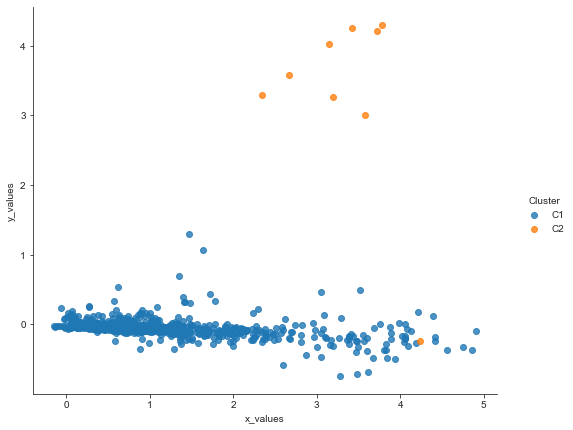

In [54]:
cluster2_data = process_data('data/cluster2_top1000.csv')
plot_cluster(cluster2_data)

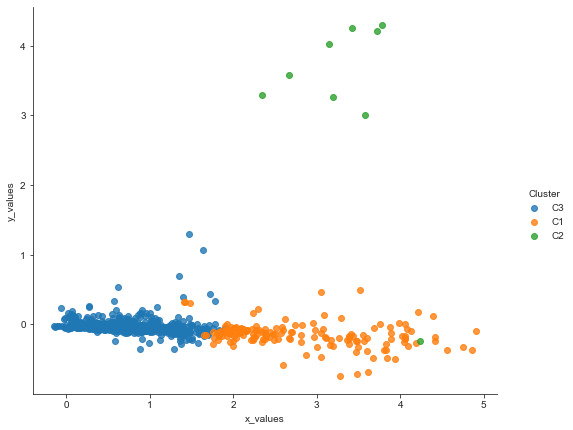

In [55]:
cluster3_data = process_data('data/cluster3_top1000.csv')
plot_cluster(cluster3_data)

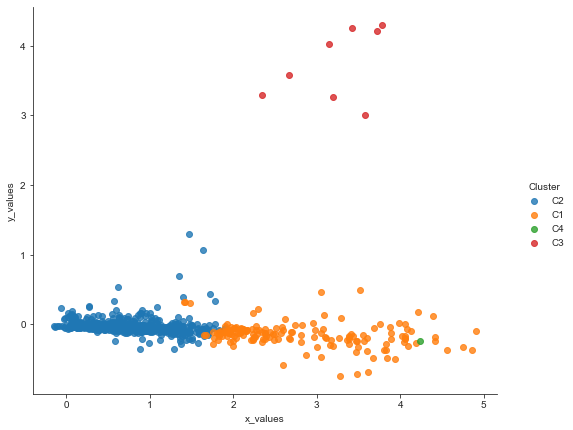

In [53]:
cluster4_data = process_data('data/cluster_top1000.csv')
plot_cluster(cluster4_data)

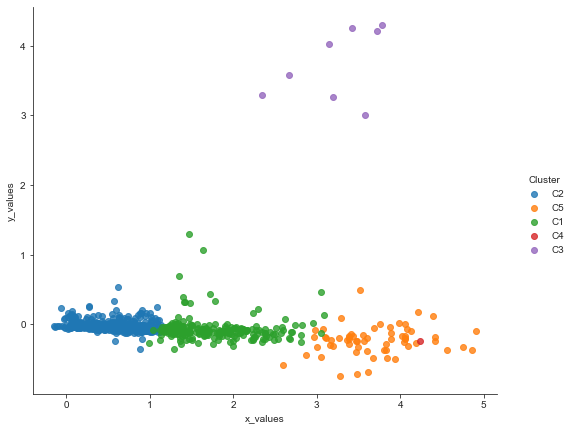

In [56]:
cluster5_data = process_data('data/cluster5_top1000.csv')
plot_cluster(cluster5_data)

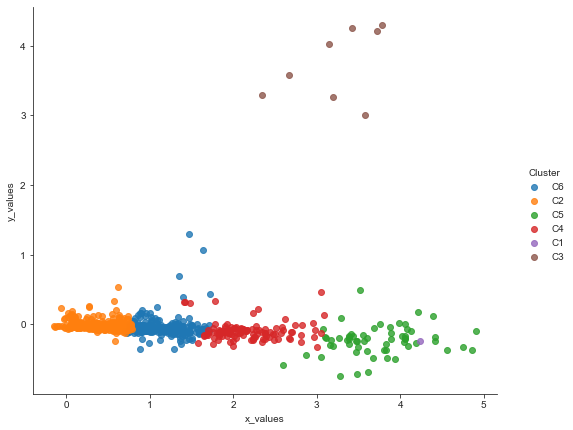

In [58]:
cluster6_data = process_data('data/cluster6_top1000.csv')
plot_cluster(cluster6_data)

In [83]:
cluster6_data.groupby('Cluster').agg(['count', 'mean'])['Silhouette']

,count,mean
Cluster,,
C1,1,0.500000
C2,544,0.671562
C3,8,0.694157
C4,112,0.621268
C5,60,0.598980
C6,275,0.598727


In [88]:
cluster6_data.sort_values('count', ascending=False)[:20]

,x_values,y_values,count,word,Cluster,Silhouette
71,4.232746,-0.236558,1528.0,store,C1,0.500000
122,3.200685,3.263005,683.0,launch,C3,0.688537
124,3.783673,4.306313,663.0,social,C3,0.702629
36,4.860034,-0.365946,598.0,android,C5,0.577045
127,3.717602,4.206253,587.0,circle,C3,0.709477
129,3.582466,3.000314,577.0,today,C3,0.684160
125,3.420786,4.252448,467.0,network,C3,0.710541
131,3.671145,-0.488340,448.0,line,C5,0.593595
55,4.751184,-0.324246,401.0,party,C5,0.613791
12,4.564972,-0.364521,388.0,free,C5,0.616656


### Create word clouds according to cluster

In [210]:
from wordcloud import WordCloud

def create_wordcloud(name, cluster, background_color='#f7f7f7', colormap='viridis'):
    wordcloud = WordCloud(min_font_size=20, prefer_horizontal=1, max_words=20, background_color=background_color, width=800, height=400, colormap=colormap, random_state=1).generate_from_frequencies(dict(cluster))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud)
    plt.title(f'{name} Word Cloud')
    plt.axis('off')
    plt.show()

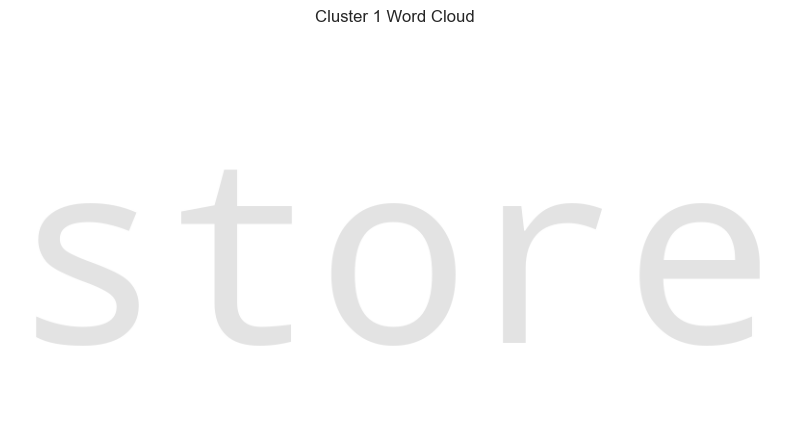

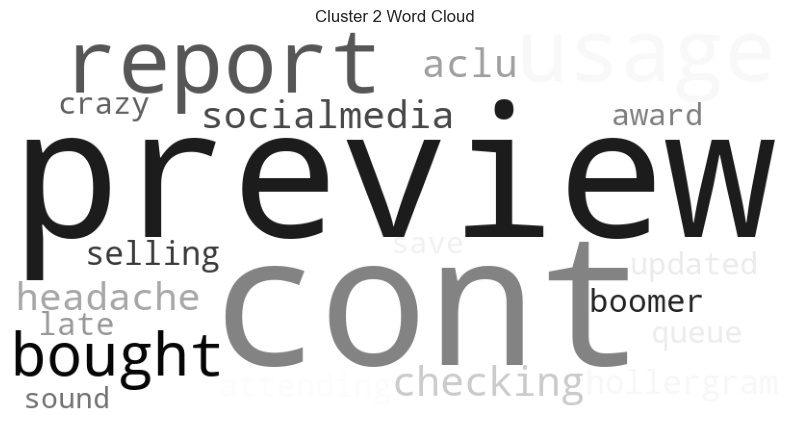

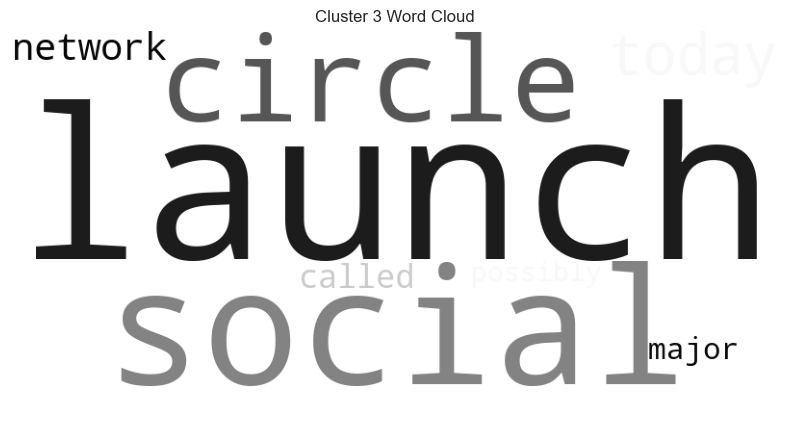

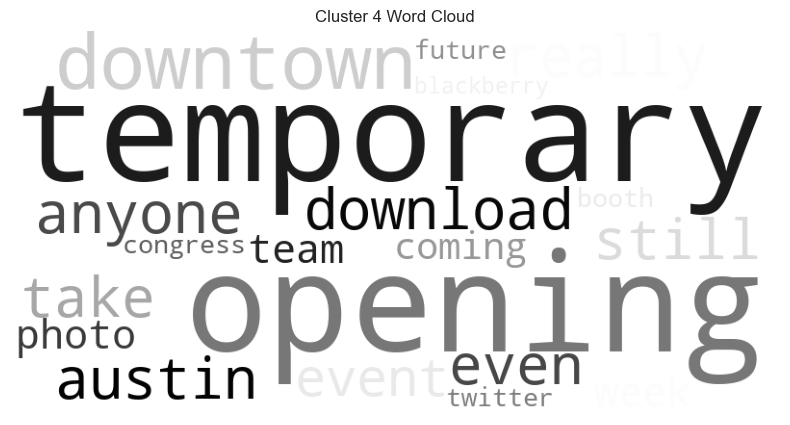

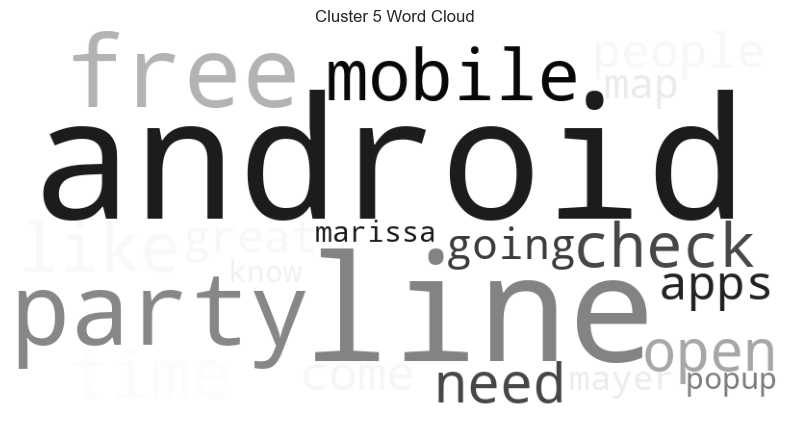

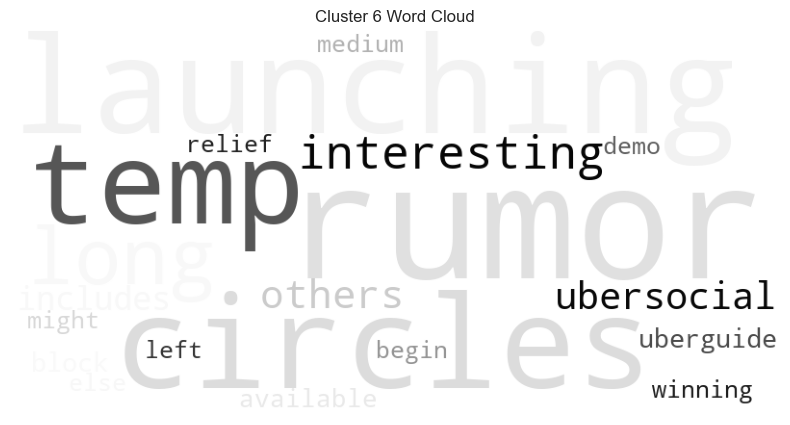

In [217]:
for key, val in cluster_dict.items():
    word_count = val[['word', 'count']].sort_values('count', ascending=False).reset_index(drop=True)
    cluster_freq = []
    for i in range(len(word_count)):
        cluster_freq.append((word_count.loc[i, 'word'], word_count.loc[i, 'count']))
    create_wordcloud(key, cluster_freq, background_color='white', colormap='Greys_r')

### Plot the most frequent words per cluster

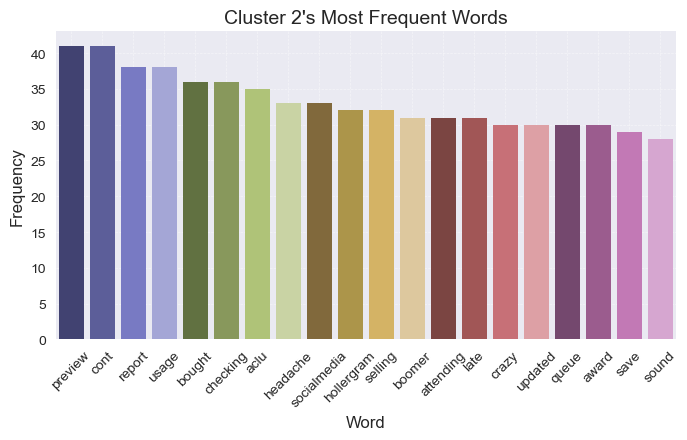

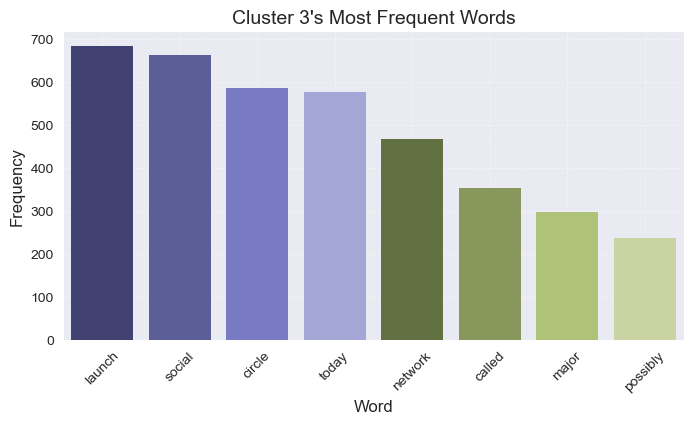

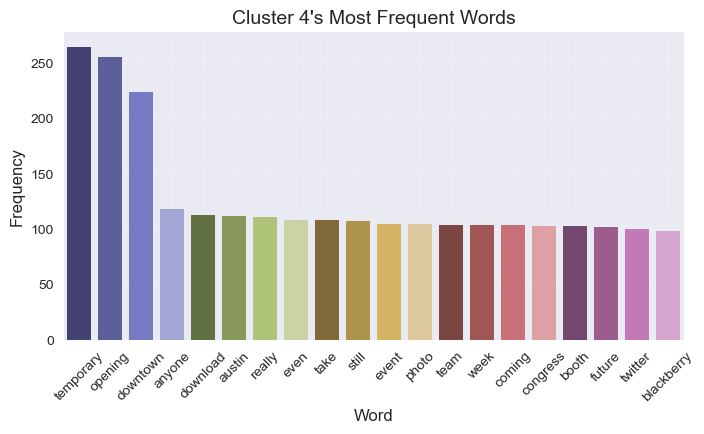

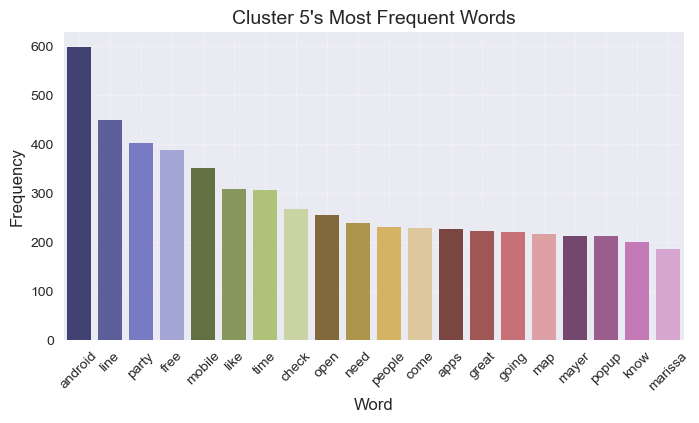

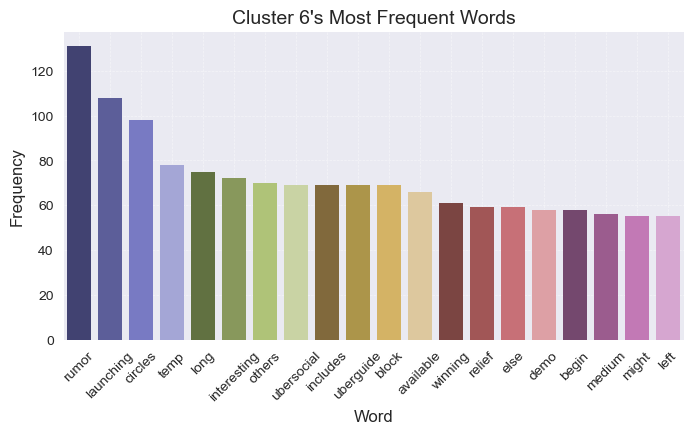

In [149]:
for key, val in cluster_dict.items():
    if key == 'Cluster 1':
        continue
    word_count = val[['word', 'count']].sort_values('count', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax = sns.barplot(x='word', y='count', data=word_count.head(20), palette='tab20b', zorder=3)
    ax.set_title(f"{key}'s Most Frequent Words", fontsize=14)
    ax.set_xlabel('Word', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(linestyle = '--', linewidth = 0.5, alpha=.5, zorder=0)

### Use 3 Principal Components on top 2000 words

In [172]:
pca = PCA(n_components=3)
PCA3_result = pca.fit_transform(vectors)
PCA3_result = pd.DataFrame(PCA3_result)

In [ ]:
PCA3_result['x_values'] =PCA_result.iloc[0:, 0]
PCA3_result['y_values'] =PCA_result.iloc[0:, 1]
PCA3_final = pd.merge(words, PCA_result, left_index=True, right_index=True)
PCA_final['word'] =PCA_final.iloc[0:, 0]
PCA_data_complet =PCA_final[['word','x_values','y_values']]

words_2k = pd.DataFrame(counter_all.most_common(2000))

words_2k['word'] = words_2k.iloc[0:, 0]
words_2k['count'] = words_2k.iloc[0:, 1]
words_2k = words_2k[['word','count']]
words_2k.to_csv('top2000_words.csv', columns=['word','count'], index=False)

# restriction to 100 most frequent words
top2000_words = pd.read_csv('top2000_words.csv')
PCA_data_top_2000 = PCA_data_complet.merge(top2000_words, how='inner', left_on='word',right_on='word')
PCA_data_top_2000.to_csv('PCA_data_top_2000.csv', index=False)

In [193]:
X_processed = np.array(PCA_result)
X_processed3d = np.array(PCA3_result)

In [189]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [194]:
cluster = AgglomerativeClustering()
cluster.fit(X_processed)
silhouette_score(X_processed, cluster.labels_)

0.87314045

In [191]:
def test_n_for_clustering(n, data):
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score, silhouette_samples
    # Fit the new clustering model
    cluster = AgglomerativeClustering(n_clusters=n)
    cluster.fit(data)
    # Print the silhouette score
    print(silhouette_score(data,cluster.labels_))
    # Return the labels attribute from the fit clustering model
    return cluster.labels_

0.87314045


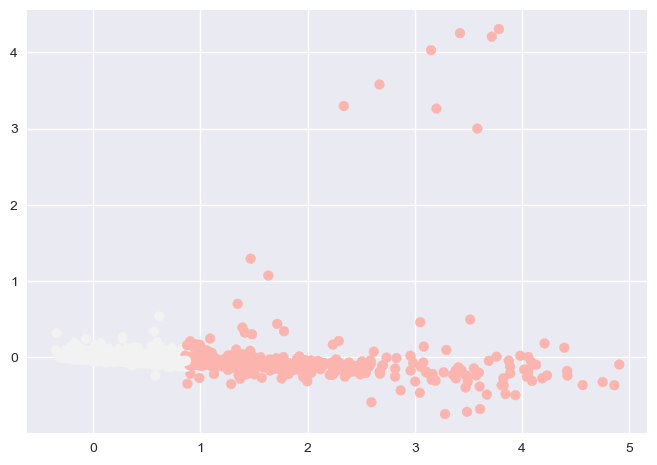

0.84996295


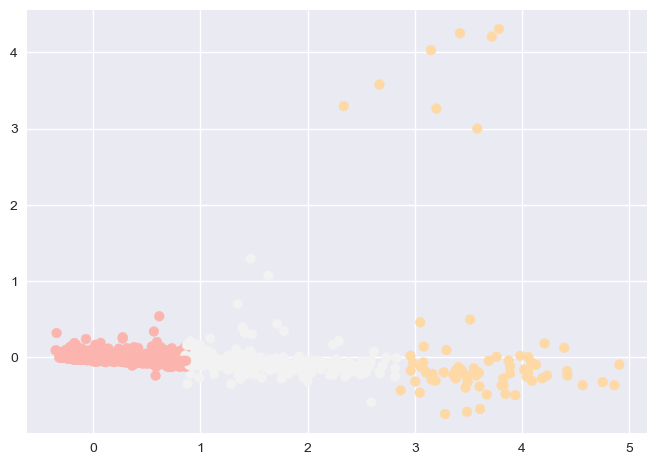

0.76040757


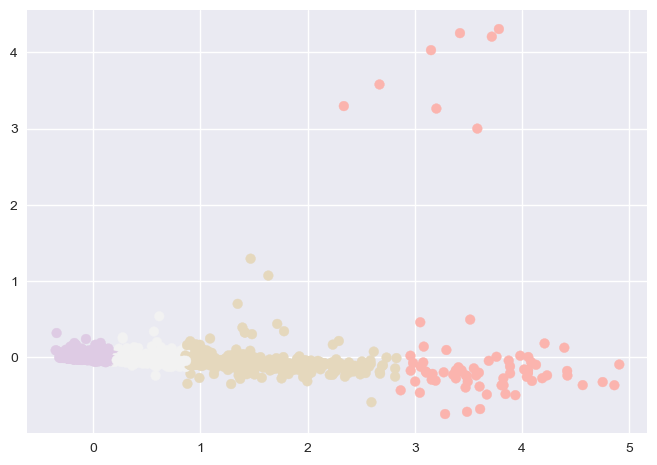

0.7617311


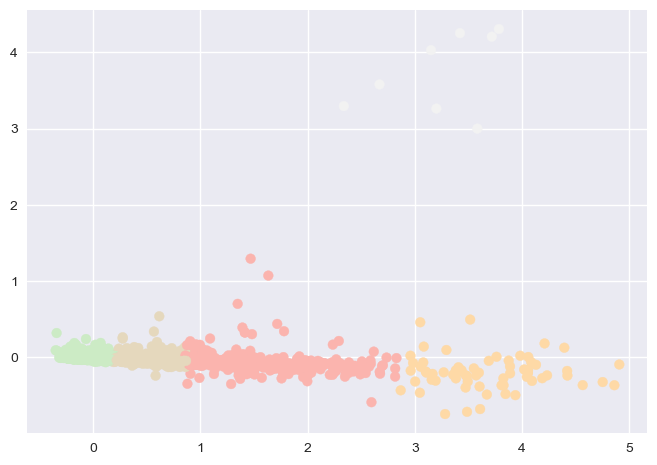

0.76252294


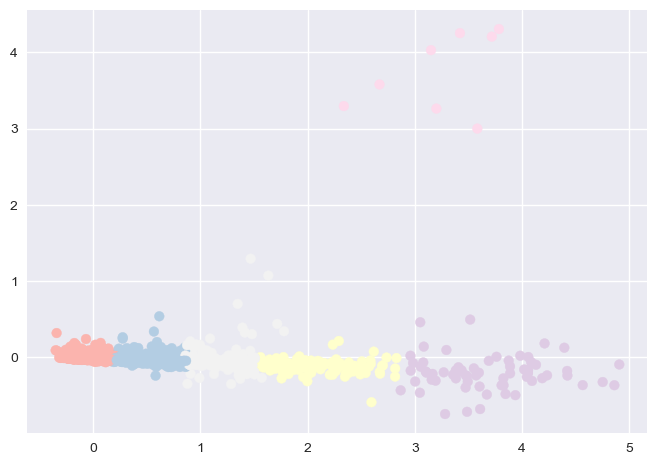

0.6317236


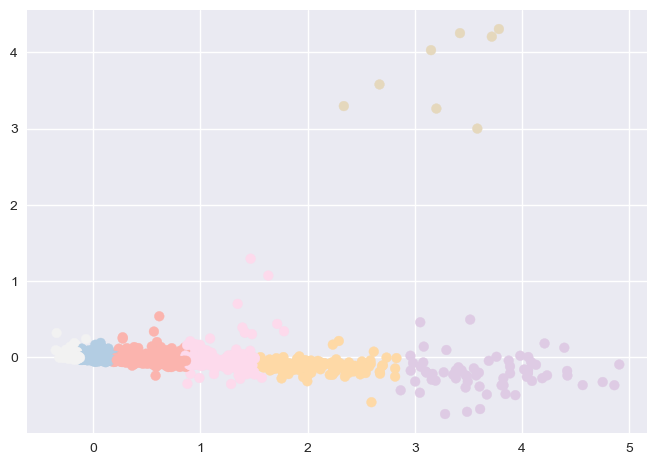

0.6290384


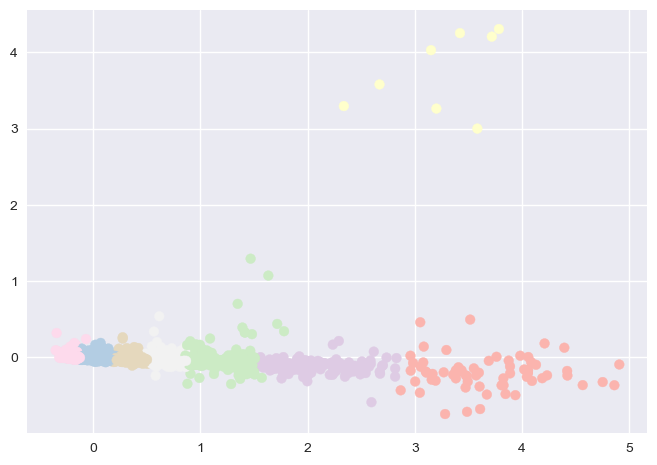

In [212]:
for n in range(2, 9):
    plt.scatter(x=X_processed[:,0], y=X_processed[:,1],c=test_n_for_clustering(n, X_processed), cmap='Pastel1')
    plt.show()

### Visualize in 3 dimensions

0.8558472


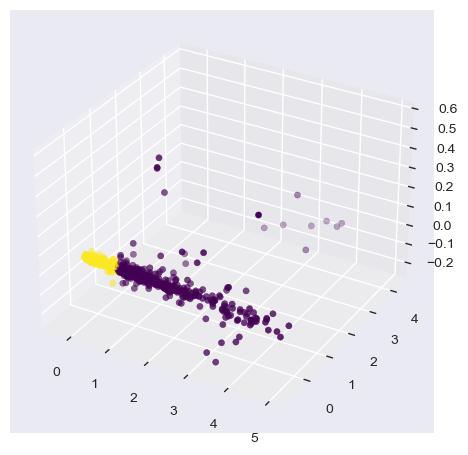

0.83906347


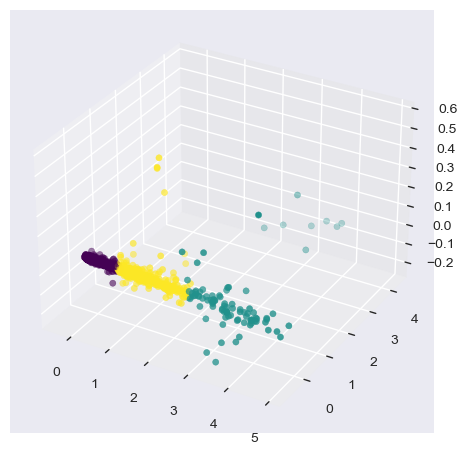

0.68342656


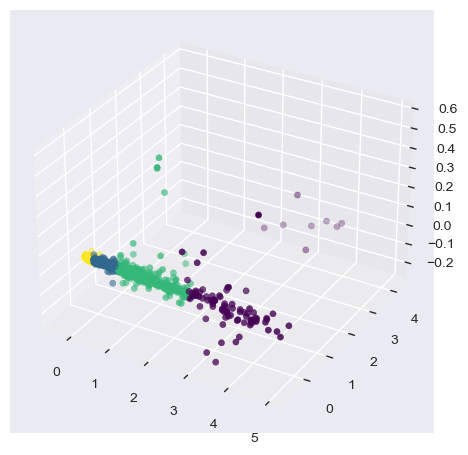

0.68461937


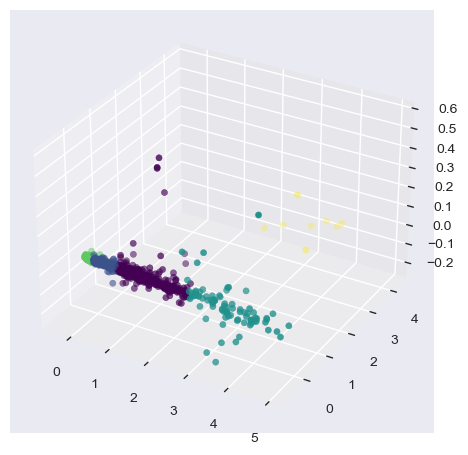

0.6843013


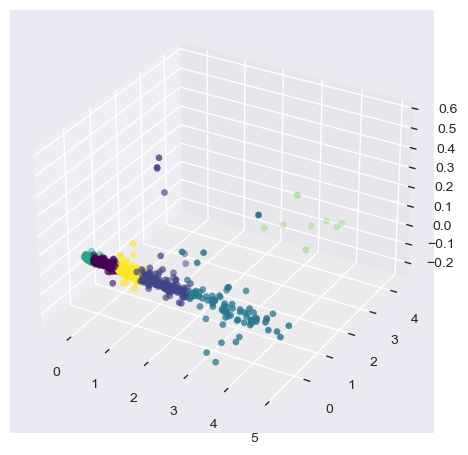

0.64969504


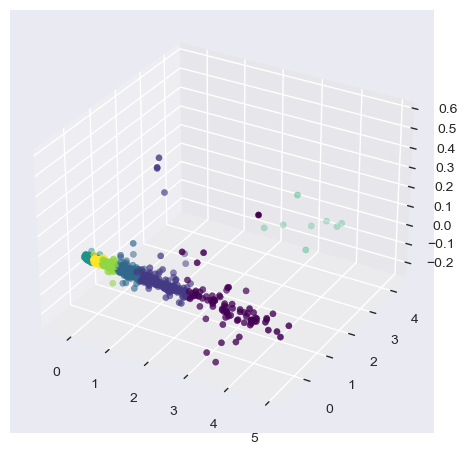

0.64734745


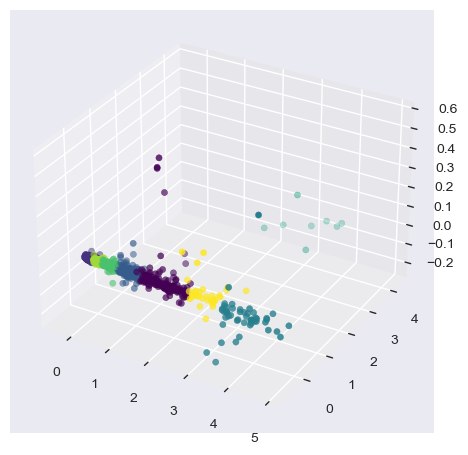

In [209]:
for n in range(2, 9):
    ax = plt.axes(projection='3d')
    ax.scatter3D(X_processed3d[:, 0], X_processed3d[:, 1], X_processed3d[:, 2], c=test_n_for_clustering(n, X_processed3d), cmap='viridis')
    plt.show()

# Contact Us <a class="anchor" id="Contact"></a>

For any questions, please do not hesitate to contact us:

Czarina Luna: [LinkedIn](https://www.linkedin.com/in/czarinaluna/) | Email: czarinagarcialuna@gmail.com<br />
Marcelo Scatena: [LinkedIn](https://uk.linkedin.com/in/marcelo-scatena) | Email: marcelo.oddo@gmail.com<br />
Ross McKim: [LinkedIn](https://www.linkedin.com/in/ross-mckim) | Email: rmckim@gmail.com<br />
Piotr Czolpik: [LinkedIn](https://www.linkedin.com/in/piotr-czolpik-803119111) | Email: Piotrczo1992@gmail.com<br />